In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
item_categories = pd.read_csv("competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("competitive-data-science-predict-future-sales/shops.csv")
sample = pd.read_csv("competitive-data-science-predict-future-sales/sample_submission.csv")
train = pd.read_csv("competitive-data-science-predict-future-sales/sales_train.csv", parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test = pd.read_csv("competitive-data-science-predict-future-sales/test.csv")

In [3]:
print(train.shape)
print(test.shape)
print(sample.shape)
print(shops.shape)
print(items.shape)
print(item_categories.shape)

(2935849, 6)
(214200, 3)
(214200, 2)
(60, 2)
(22170, 3)
(84, 2)


In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [7]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
shops.sample(10)

,shop_name,shop_id
50,"Тюмень ТЦ ""Гудвин""",50
42,"СПб ТК ""Невский Центр""",42
31,"Москва ТЦ ""Семеновский""",31
55,Цифровой склад 1С-Онлайн,55
59,"Ярославль ТЦ ""Альтаир""",59
20,"Москва ""Распродажа""",20
13,"Казань ТЦ ""Бехетле""",13
6,"Воронеж (Плехановская, 13)",6
49,"Тюмень ТРЦ ""Кристалл""",49
54,"Химки ТЦ ""Мега""",54


In [9]:
shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
print(items.isnull().sum().sum())
print(shops.isnull().sum().sum())
print(item_categories.isnull().sum().sum())

0
0
0
0
0


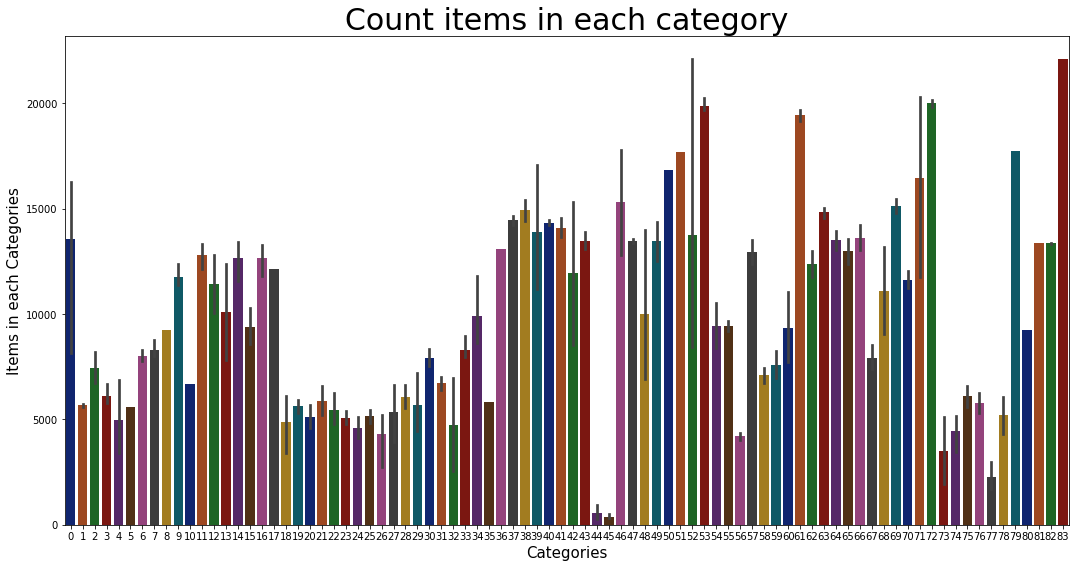

In [13]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.barplot(items['item_category_id'], items['item_id'], palette = 'dark')
plt.title('Count items in each category', fontsize = 30)
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

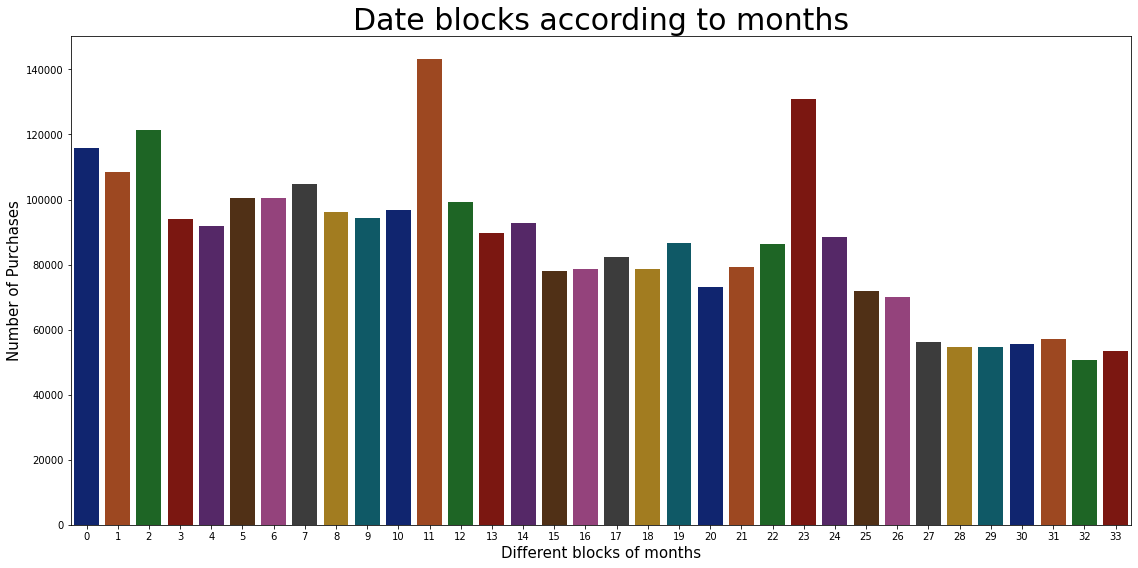

In [14]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(train['date_block_num'], palette = 'dark')
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('Number of Purchases', fontsize = 15)
plt.show()

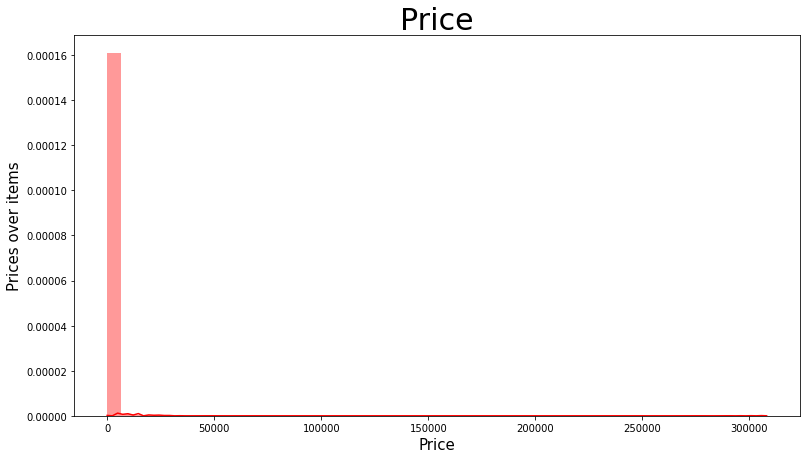

In [15]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train['item_price'], color = 'red')
plt.title('Price', fontsize = 30)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Prices over items', fontsize = 15)
plt.show()

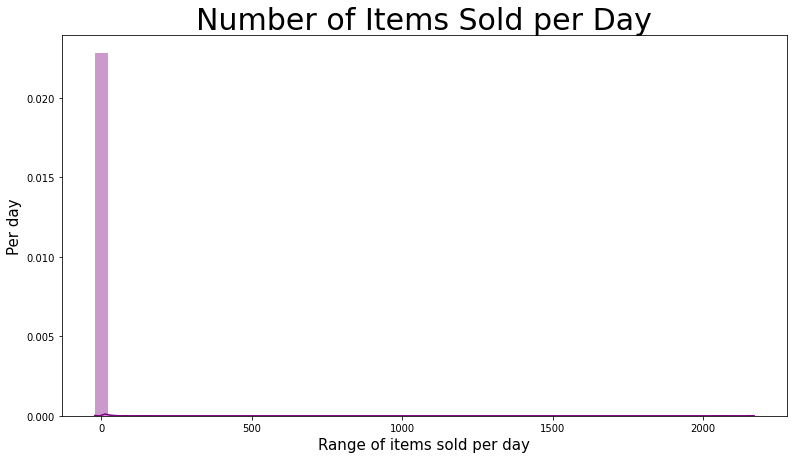

In [16]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train['item_cnt_day'], color = 'purple')
plt.title('Number of Items Sold per Day', fontsize = 30)
plt.xlabel('Range of items sold per day', fontsize = 15)
plt.ylabel('Per day', fontsize = 15)
plt.show()

In [17]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['week'] = train['date'].dt.week
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

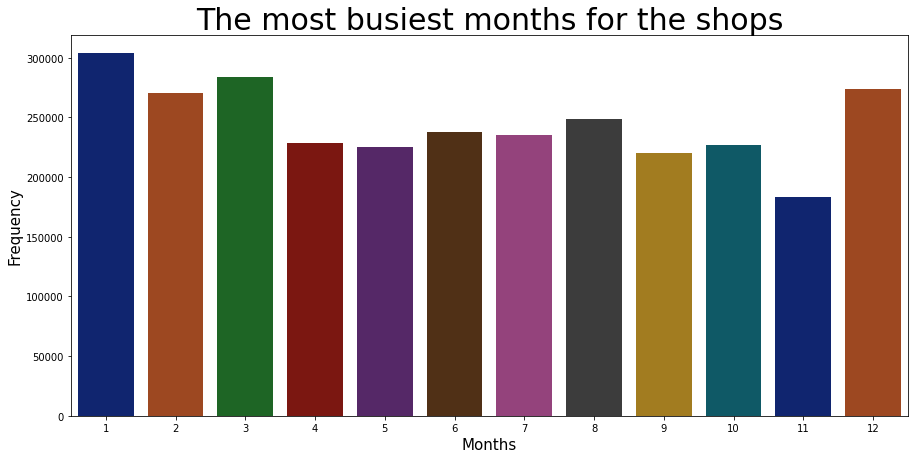

In [18]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(train['month'], palette = 'dark')
plt.title('The most busiest months for the shops', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

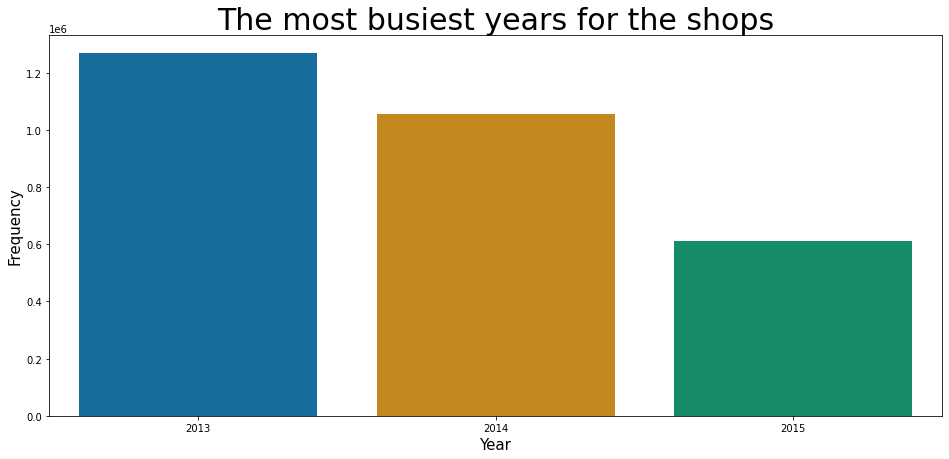

In [19]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.countplot(train['year'], palette = 'colorblind')
plt.title('The most busiest years for the shops', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

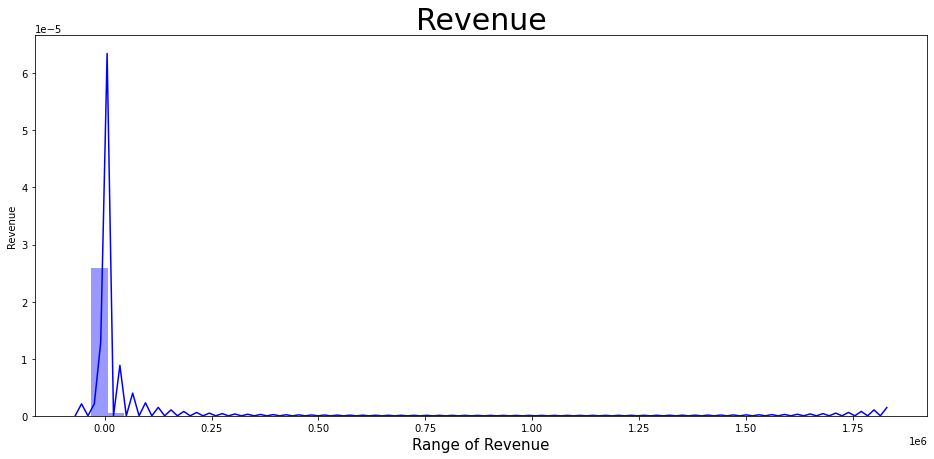

In [20]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

sns.distplot(train['revenue'], color = 'blue')
plt.title('Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

## Data processing

In [21]:
item_category_id_df = pd.get_dummies(items['item_category_id'], prefix='item_category_id')
item_category_id_df = pd.concat([items['item_id'], item_category_id_df], axis=1)

In [22]:
monthly_sales = train.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].count().unstack().reset_index()
monthly_sales.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,31,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,32,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,33,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
monthly_sales = pd.merge(monthly_sales, item_category_id_df, on='item_id')

In [24]:
monthly_sales = monthly_sales.fillna(0)

## Modelling

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [26]:
X_train = monthly_sales.drop(['shop_id', 'item_id', 33], axis=1)
Y_train = monthly_sales[33]

In [27]:
lr = Lasso()
lr.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
Y_pred = lr.predict(X_train)
np.sqrt(mean_squared_error(y_true=Y_train, y_pred=Y_pred))

0.655036090425938

In [29]:
test = pd.merge(test, monthly_sales, how='left', on=['shop_id', 'item_id'])

In [30]:
test = test.fillna(0)

In [31]:
X_test = test.drop(['ID', 'shop_id', 'item_id', 33], axis=1)
Y_pred = lr.predict(X_test)

In [32]:
submission_sales = pd.DataFrame({'ID':test['ID'], 'item_cnt_month': Y_pred})

In [33]:
submission_sales.to_csv('./submission_sales.csv', index=False)